Final Project Tentang
COVID19_Clustering,_Regression,_and_Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [32]:
file_path = '/content/drive/MyDrive/BIG DATA & PREDICTIVE ANALYTICS/Tugas/Final Project/Covid-19 Indonesia Dataset.csv'
data = pd.read_csv(file_path)

In [33]:
print('Jumlah baris:', data.shape[0])
print('Jumlah kolom:', data.shape[1])
print(data.info())
print(data.describe())

Jumlah baris: 31822
Jumlah kolom: 38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-nu

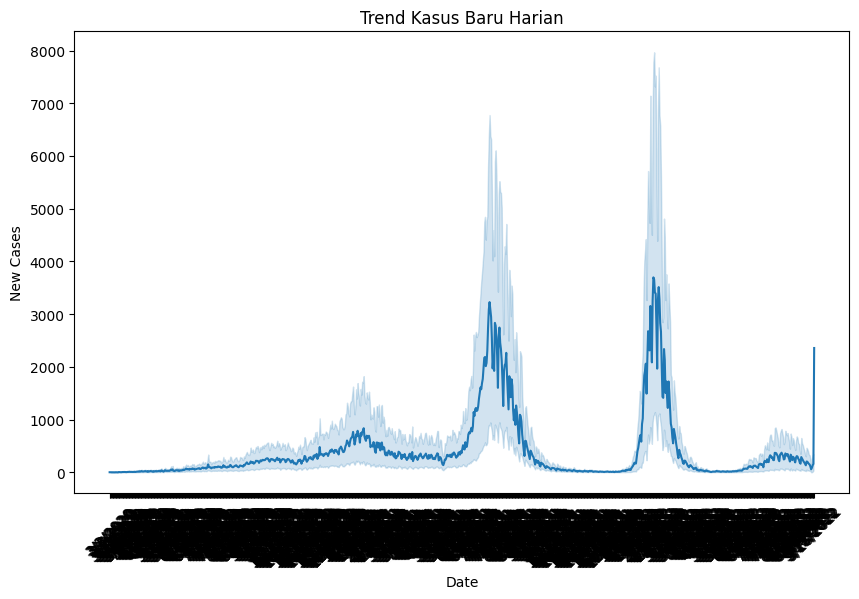

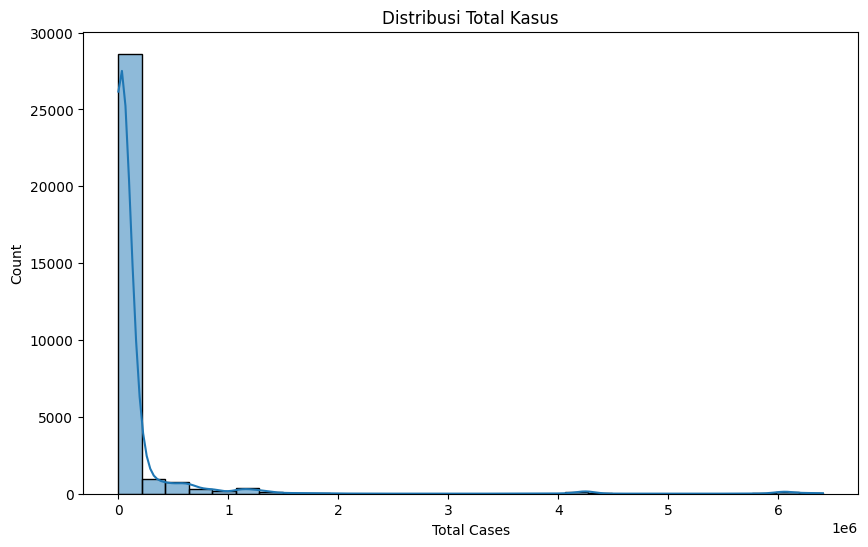

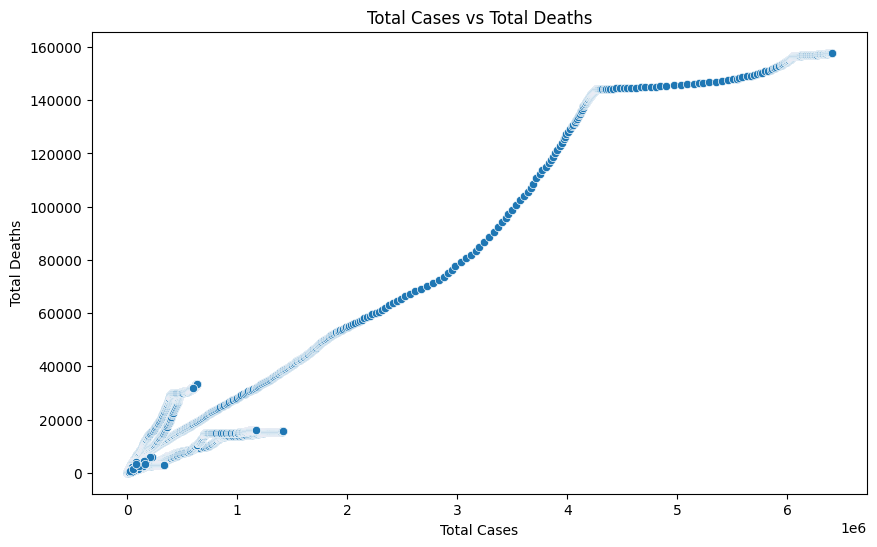

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='Date', y='New Cases')
plt.title('Trend Kasus Baru Harian')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data['Total Cases'], bins=30, kde=True)
plt.title('Distribusi Total Kasus')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Cases', y='Total Deaths', data=data)
plt.title('Total Cases vs Total Deaths')
plt.show()

              Total Cases  Total Deaths  New Cases
Total Cases      1.000000      0.971399   0.450040
Total Deaths     0.971399      1.000000   0.437586
New Cases        0.450040      0.437586   1.000000


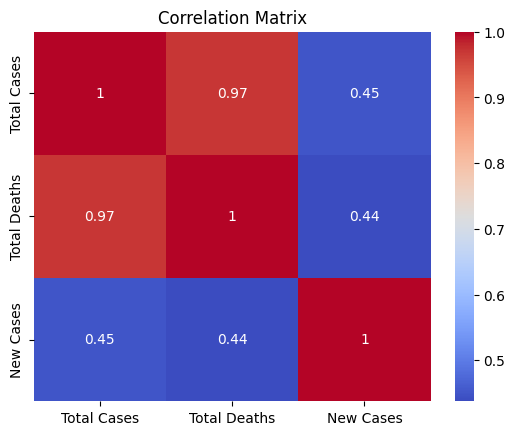

In [36]:
corr = data[['Total Cases', 'Total Deaths', 'New Cases']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [47]:
X = data[['Total Cases']]
y = data['Total Deaths']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print('Koefisien:', model.coef_)
print('Intersep:', model.intercept_)

Koefisien: [0.02737275]
Intersep: 206.8613921375636


MAE: 1422.5790566769163
R2 Score: 0.939372727667665


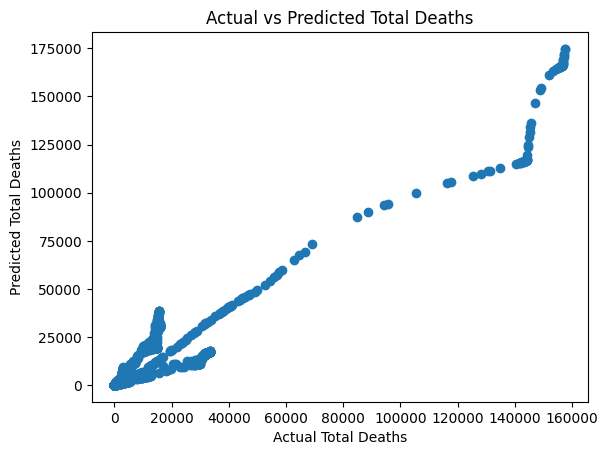

In [54]:
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Deaths')
plt.ylabel('Predicted Total Deaths')
plt.title('Actual vs Predicted Total Deaths')
plt.show()

In [53]:
import plotly.express as px
import plotly.graph_objects as go

fig_cases = px.bar(data.groupby('Province')['Total Cases'].sum().reset_index(),
                   x='Province', y='Total Cases',
                   title='Total Kasus per Provinsi', text_auto=True)
fig_cases.show()

fig_trend = px.line(data, x='Date', y='Total Cases', title='Tren Total Kasus Harian')
fig_trend.show()

fig_scatter = px.scatter(data, x='Total Cases', y='Total Deaths',
                         title='Scatter Total Cases vs Total Deaths')
fig_scatter.show()

corr = data[['Total Cases', 'Total Deaths', 'Total Recovered']].corr()
fig_corr = px.imshow(corr, text_auto=True, title='Korelasi antar Fitur')
fig_corr.show()

In [55]:
import plotly.express as px
fig = px.line(data, x='Date', y='New Cases', title='Kasus Baru Harian')
fig.show()